In [1]:
using PyPlot

In [2]:
#
# Newton's method:
# F  - a vector-valued function
# dF - Jacobian matrix of F
# x0 - a starting vector for the Newton iteration
#
# returns a vector as result
#
function newton(F, dF, x0, precision = 1.e-8)
    x = x0;
    for i = 1:100
        step = - inv(dF(x)) * F(x)
        x = x + step
        if (norm(F(x)) < precision)
            return x
        end
    end
    error("no convergence")
end

newton (generic function with 2 methods)

In [3]:
#
# (Explicit) Forward Euler scheme:
# f  - rhs of differential equation
# df - Jacobian matrix of f (not used)
# t0 - Initial time
# y0 - Initial value
# h  - step length
# T  - right boundary of time interval [t0,T]
#
function forward_euler(f, df, t0, y0, h, T)
    d = length(y0)
    N = convert(Int64, floor((T-t0)/h))
    
    t = zeros(1, N + 1)
    y = zeros(d, N + 1)

    # Initial values:
    t[1] = t0
    y[:,1] = y0

    for i = 1:N
        t[i+1] = t[i] + h
        y[:,i+1] = y[:,i] + h * f(t[i], y[:,i])
    end
    
    return (t, y)
end

forward_euler (generic function with 1 method)

In [4]:
#
# (implicit) backward Euler scheme:
# f  - rhs of differential equation
# df - Jacobian matrix of f
# t0 - Initial time
# y0 - Initial value
# h  - step length
# T  - right boundary of time interval [t0,T]
#
function backward_euler(f, df, t0, y0, h, T)
    d = length(y0)
    N = convert(Int64, floor((T-t0)/h))
    
    t = zeros(1, N + 1)
    y = zeros(d, N + 1)

    # Initial values:
    t[1] = t0
    y[:,1] = y0

    for i = 1:N
        t[i+1] = t[i] + h
        
        G(z) = y[:,i] + h * f(t[i+1], z) - z
        dG(z) = h * df(t[i+1], z) - eye(d)
        y[:,i+1] = newton(G, dG, y[:,i])
    end
    
    return (t, y)
end

backward_euler (generic function with 1 method)

In [7]:
#
# (implicit) trapezoidal-rule, or Crank-Nicolson scheme:
# f  - rhs of differential equation
# df - Jacobian matrix of f
# t0 - Initial time
# y0 - Initial value
# h  - step length
# T  - right boundary of time interval [t0,T]
#
function crank_nicolson(f, df, t0, y0, h, T)
    d = length(y0)
    N = convert(Int64, floor((T-t0)/h))
    
    t = zeros(1, N + 1)
    y = zeros(d, N + 1)

    # Initial values:
    t[1] = t0
    y[:,1] = y0

    for i = 1:N
        t[i+1] = t[i] + h
        
        G(z) = y[:,i] + h * 0.5 * (f(t[i+1], z) + f(t[i], y[:,i])) - z
        dG(z) = 0.5 * h * df(t[i+1], z) - eye(d)
        y[:,i+1] = newton(G, dG, y[:,i])
    end
    
    return (t, y)
end

crank_nicolson (generic function with 1 method)

In [47]:
σ = 10
β = 8/3
ρ = 28

f(t, x) = [
    σ*(x[2]-x[1]);
    x[1]*(ρ-x[3]) - x[2];
    x[1]*x[2] - β*x[3]
]

df(t,x) = [
    -σ σ 0;
    (ρ-x[3]) -1 -x[1];
    x[2] x[1] -β
]

h = 0.01
t_0 = 0;
y_0 = [1; 1; 1]
T = 32

32

In [48]:
ta,ya = crank_nicolson(f, df, t_0, y_0, h, T)
tb,yb = crank_nicolson(f, df, t_0, y_0, h/2, T)
tb,yb = crank_nicolson(f, df, t_0, y_0, h/4, T)

(
[0.0 0.0025 … 31.9975 32.0],

[1.0 1.0008 … -3.92988 -3.98019; 1.0 1.06495 … -5.91762 -6.01718; 1.0 0.995929 … 16.4477 16.3972])

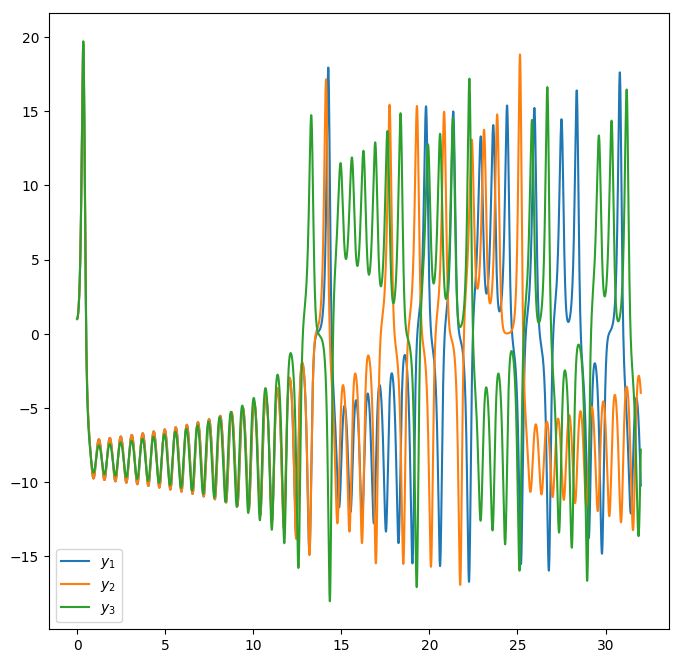

In [49]:
# Plot y[1,:] and y[2,:] over time:
         figure(figsize=(8,8))
         plot(ta', ya[1,:], label="\$y_1\$")
         plot(tb', yb[1,:], label="\$y_2\$")
         plot(tc', yc[1,:], label="\$y_3\$")
         #plot(ta', ya[2,:], label="\$y_2\$")
         #plot(ta', ya[3,:], label="\$y_3\$")
         legend();

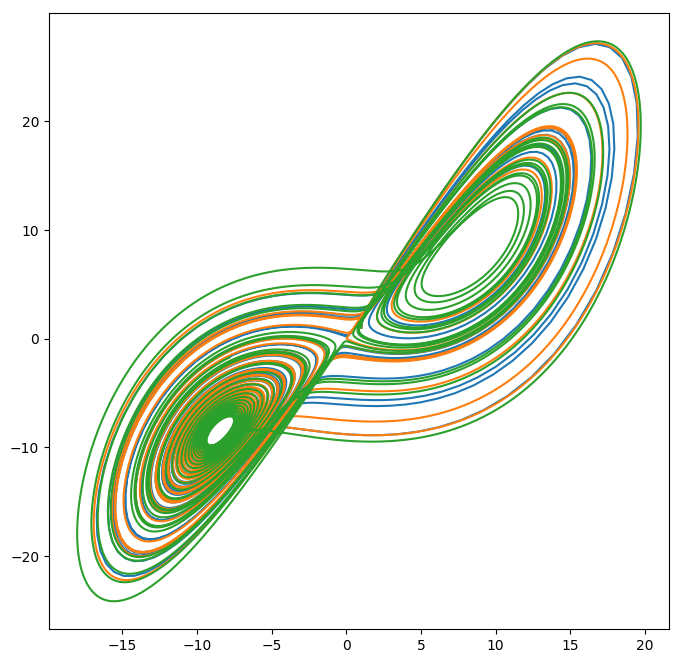

In [50]:
# xy-plot
         figure(figsize=(8,8))
         plot(ya[1,:], ya[2,:]);
         plot(yb[1,:], yb[2,:]);
         plot(yc[1,:], yc[2,:]);

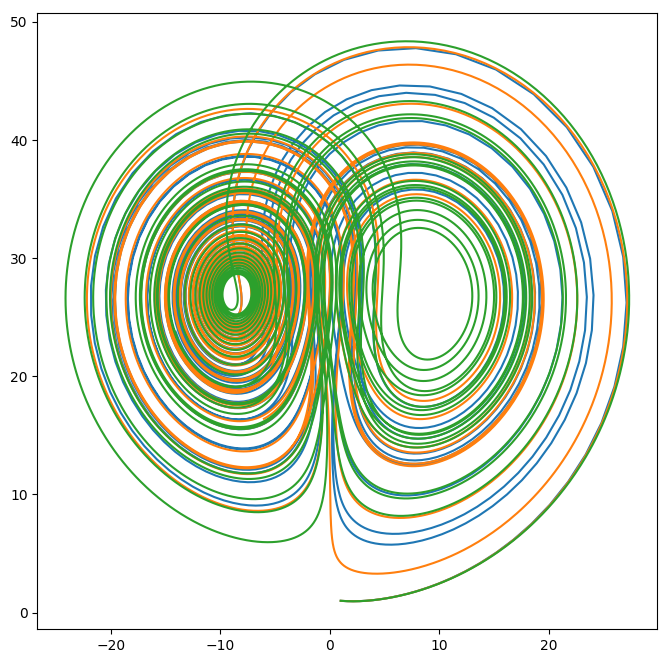

In [51]:
# yz-plot
         figure(figsize=(8,8))
         plot(ya[2,:], ya[3,:]);
         plot(yb[2,:], yb[3,:]);
         plot(yc[2,:], yc[3,:]);

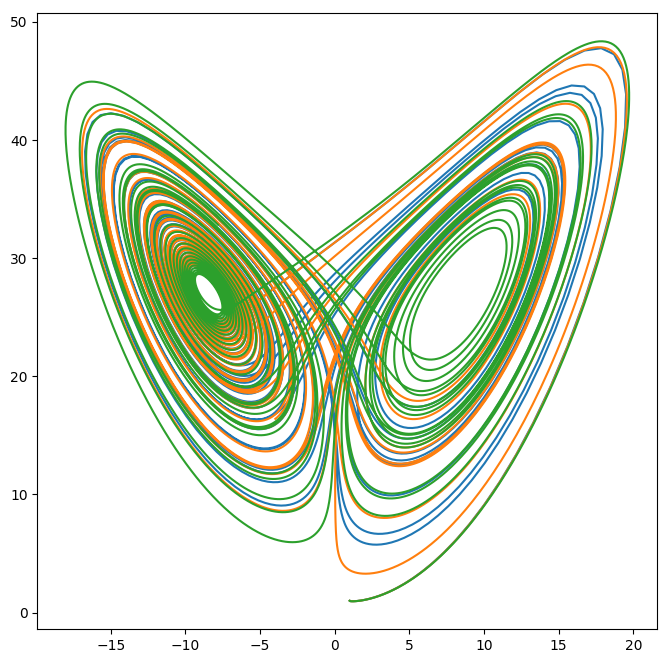

In [53]:
# xz-plot
         figure(figsize=(8,8))
         plot(ya[1,:], ya[3,:]);
         plot(yb[1,:], yb[3,:]);
         plot(yc[1,:], yc[3,:]);